In [1]:
# Импортируем все нужные библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
# Убираем предупреждения
import warnings
warnings.filterwarnings('ignore')

Загружаем все необходимые таблицы:<br>
1) olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей <br>
2) olist_orders_dataset.csv —  таблица заказов <br>
3) olist_order_items_dataset.csv —  товарные позиции, входящие в заказы <br>

In [3]:
df_customers = pd.read_csv('files/olist_customers_dataset.csv', sep=',')
df_orders = pd.read_csv('files/olist_orders_dataset.csv', sep=',')
df_orders_items = pd.read_csv('files/olist_order_items_dataset.csv', sep=',')

### Первичный анализ

Посмотрим на структуру данных и есть ли в них дубликаты

In [4]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
df_customers.duplicated().sum()

0

In [7]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
df_orders.duplicated().sum()

0

In [10]:
df_orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
df_orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
df_orders_items.duplicated().sum()

0

Проверим есть ли в данных пропуски 

In [13]:
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
df_orders_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Вероятно, пропущенные данные связаны с тем, что заказ ещё не дошел до определенного статуса оплаты (завершения заказа). <br>
Проверим так ли это

In [16]:
# Посмотрим при каких статусах заказа время подтверждения оплаты заказа не было указано
df_orders[df_orders["order_approved_at"].isnull()]["order_status"].value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [17]:
# Взглянем подробнее на строки где статус равен delivered
df_orders[(df_orders["order_approved_at"].isnull()) & (df_orders["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


Видимо произошла какая-то техническая ошибка и order_approved_at не был указан. Потому что заказ был доставлен покупателю, а время оплаты не сохранилось.

In [18]:
# Теперь посмотрим на заказы со статусом created
df_orders[(df_orders["order_approved_at"].isnull()) & (df_orders["order_status"] == "created")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00


Видно, что заказ был создан, но пока что не прошел следующие этапы обработки заказа

In [19]:
df_orders[df_orders["order_delivered_customer_date"].isnull()]["order_status"].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [20]:
df_orders[(df_orders["order_delivered_customer_date"].isnull()) & (df_orders["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


Время доставки не было указано, хотя заказ имеет статус "delivered". Возможно, опять дело в технических проблемах сервиса

### Сколько у нас пользователей, которые совершили покупку только один раз? 

Будем считать за покупку статусы заказа: delivered и approved 

In [21]:
# Сначала объеденим таблицы покупателей с их заказами по столбцу customer_id
df_merged = df_customers.merge(df_orders, on='customer_id')

In [22]:
df_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [23]:
# Теперь найдем все заказы со статусом "доставлен", сгруппируем их по customer_unique_id и посчитаем кол-во заказов order_id = 1
df_merged.query('order_status == "delivered" | order_status=="approved"') \
            .groupby("customer_unique_id", as_index=False) \
            .agg({"order_id":"count"}) \
            .query('order_id == 1')

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93355,fffcf5a5ff07b0908bd4e2dbc735a684,1
93356,fffea47cd6d3cc0a88bd621562a9d061,1
93357,ffff371b4d645b6ecea244b27531430a,1
93358,ffff5962728ec6157033ef9805bacc48,1


Получаем, что пользователей, которые совершили покупку только один раз, оказалось 90559

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

In [24]:
# Посмотрим на распределение статусов заказа
df_orders.order_status.value_counts(normalize=True)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

In [25]:
# Оставим только те заказы, которые не были доставлены
df_orders_not_delivered = df_orders.query('order_status in ["canceled", "unavailable"]')
df_orders_not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14 00:00:00
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22 00:00:00
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00


Для данной задачи будем работать со столбцом order_estimated_delivery_date, так как даже если заказ недоступен или был отменен, дата обещанной доставки все равно указывается (в этом можно убедиться, посмотрев на пропуски в данных)

In [26]:
# Преобразуем дату обещанной доставки в формат даты по месяцам
df_orders_not_delivered['order_estimated_delivery_date'] = pd.to_datetime(df_orders_not_delivered['order_estimated_delivery_date'])
df_orders_not_delivered['month'] = df_orders_not_delivered.order_estimated_delivery_date.dt.to_period('M')

In [27]:
df_orders_not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05,2017-12
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaN,NaN,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16,2018-02
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaN,2018-02-22,2018-02
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05,2017-09


In [28]:
# Для того чтобы учитывать те месяцы, по которым нет данных для ряда статусов, заменим их пропуски на 0
df_orders_not_delivered = df_orders_not_delivered.fillna(0)
df_orders_not_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,0,0,2017-12-05,2017-12
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,0,0,2018-08-14,2018-08
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,0,0,2018-02-16,2018-02
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,0,2018-02-22,2018-02
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,0,0,2017-09-05,2017-09


In [29]:
# Группируем данные по датам и статусу заказов, считаем кол-во заказов за каждый месяц и сортируем по дате
df_orders_by_date = df_orders_not_delivered.groupby(["month", "order_status"], as_index=False) \
                                            .agg({"order_id": "count"}) \
                                            .rename(columns={
                                                            "order_id": "quantity_orders"
                                                            }) \
                                            .sort_values("month")
df_orders_by_date.head()

,month,order_status,quantity_orders
0,2016-09,canceled,1
1,2016-10,canceled,3
2,2016-11,canceled,14
3,2016-11,unavailable,5
4,2016-12,canceled,8


In [30]:
# Получаем какое кол-во заказов в месяц в среднем не доставляется по разным причинам
df_orders_by_date.groupby(["order_status"], as_index=False).agg({"quantity_orders": "mean"})

,order_status,quantity_orders
0,canceled,24.038462
1,unavailable,29.000000


###  По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [31]:
# Для начала объеденим таблицы заказов и товарные позиции, входящие в заказы в один датафрейм
df_merged_1 = df_orders.merge(df_orders_items, on="order_id", how="inner")
df_merged_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [32]:
# Преорбразуем дату создания заказа в формат даты по дням недели
df_merged_1['order_purchase_timestamp'] = pd.to_datetime(df_merged_1['order_purchase_timestamp'])
df_merged_1['day_of_week'] = df_merged_1['order_purchase_timestamp'].dt.day_name()
df_merged_1['day_of_week'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Saturday
4      Tuesday
Name: day_of_week, dtype: object

In [33]:
# Группируем данные по product_id и day_of_week. После считаем кол-во id товара внутри одного заказа во всех заказах
df_items_by_day_of_week = df_merged_1.groupby(["product_id", "day_of_week"], as_index=False) \
            .agg({"order_item_id": "count"}) \
            .rename(columns={"order_item_id": "quantity_product"}) 
df_items_by_day_of_week.head()

,product_id,day_of_week,quantity_product
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [34]:
# Найдем максимальное количество продаж для каждого товара
df_max_sales = df_items_by_day_of_week.groupby('product_id')['quantity_product'].max() \
                                                                                .reset_index() \
                                                                                .rename(columns={'quantity_product': 'max_quantity'})
                                
df_max_sales

,product_id,max_quantity
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,1
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


Будем также учитывать случаи, когда у товара несколько дней с максимальными продажами и сортировать их по алфавиту

In [35]:
df_max_sales = pd.merge(df_items_by_day_of_week, df_max_sales, on='product_id')

In [36]:
# Выбираем строки, где количество продаж равно максимальному, и выбираем первый день по алфавиту
df_max_sales = df_max_sales[df_max_sales['quantity_product'] == df_max_sales['max_quantity']]
df_max_sales = df_max_sales[["product_id", "day_of_week", "max_quantity"]]

In [37]:
df_max_sales.head()

,product_id,day_of_week,max_quantity
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
P.S. Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [38]:
# Для начала отберем только данные с покупками
df_purchases = df_merged[(df_merged.order_status == "approved") | (df_merged.order_status == "delivered")]

In [39]:
# Преобразуем столбец order_purchase_timestamp в формат даты
df_purchases["order_purchase_timestamp"] = pd.to_datetime(df_purchases["order_purchase_timestamp"])

In [40]:
# Посчитаем количество покупок по дням 
df_purchases_1 = df_purchases.groupby(["customer_unique_id", "order_purchase_timestamp"], as_index=False) \
                             .agg({"order_id": "count"}) \
                             .rename(columns={"order_id": "quantity_purchases"})

In [41]:
df_purchases_1.head()

,customer_unique_id,order_purchase_timestamp,quantity_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1


In [42]:
# Разобьем дату на интервалы по месяцам
df_purchases_1["period_of_month"] = df_purchases_1["order_purchase_timestamp"].dt.to_period('M')

In [43]:
# Считаем общее количество покупок в месяц для каждого пользователя
df_purchases_1 = df_purchases_1.groupby(["customer_unique_id", "period_of_month"], as_index=False) \
              .agg({"quantity_purchases": "sum"}) \
              .rename(columns={"quantity_purchases": "quantity_purchases_of_month"})

In [44]:
# Определяем кол-во недель в каждом месяце (без округления)
df_purchases_1["quantity_week_in_month"] = df_purchases_1["period_of_month"].dt.days_in_month / 7

In [45]:
# Рассчитываем среднее количество покупок в неделю 
df_purchases_1["avg_purchases_of_week"] = df_purchases_1["quantity_purchases_of_month"] / df_purchases_1["quantity_week_in_month"]

In [46]:
df_purchases_1 = df_purchases_1[["customer_unique_id", "period_of_month", "avg_purchases_of_week"]]

In [47]:
df_purchases_1.head()

,customer_unique_id,period_of_month,avg_purchases_of_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333


 ### Провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.

In [48]:
# Отфильтруем нужные нам столбцы с данными
df_retention = df_merged[["customer_unique_id", "order_id", "order_purchase_timestamp"]]
df_retention.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30


In [49]:
# Преобразуем столбец order_purchase_timestamp  в формат даты
df_retention["order_purchase_timestamp"] = pd.to_datetime(df_retention["order_purchase_timestamp"])
# Создание столбца с месяцем каждой покупки
df_retention['purchase_month'] = df_retention['order_purchase_timestamp'].dt.to_period('M')

In [50]:
df_retention.head()

,customer_unique_id,order_id,order_purchase_timestamp,purchase_month
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07


Данные у нас с сентября 2016 года по октябрь 2018 года. Отчетный период возьмем за: январь - декабрь 2017 года.

In [51]:
max_year = max(df_retention["purchase_month"])
min_year = min(df_retention["purchase_month"])
print(f"{min_year} : {max_year}")

2016-09 : 2018-10


In [52]:
# Определяем первую покупку для каждого клиента
first_orders = df_retention.groupby("customer_unique_id", as_index=False)["purchase_month"] \
                            .agg({"purchase_month": "min"}) \
                            .rename(columns={"purchase_month": "first_order_date"})
first_orders

,customer_unique_id,first_order_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12
96093,ffff371b4d645b6ecea244b27531430a,2017-02
96094,ffff5962728ec6157033ef9805bacc48,2018-05


In [53]:
# Добавим дату первой покупки к нашей основной таблице 
df_retention = df_retention.merge(first_orders, on="customer_unique_id", how="inner")

In [54]:
# Группируем данные по когортам и месяцу покупки, считаем количество уникальных клиентов
df_group = df_retention.groupby(['first_order_date', 'purchase_month'], as_index=False) \
                        .agg({'customer_unique_id': 'nunique'}) \
                        .rename(columns={"customer_unique_id": "retention_customers"}) 
df_group.head()

,first_order_date,purchase_month,retention_customers
0,2016-09,2016-09,4
1,2016-10,2016-10,321
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1


In [55]:
# Фильтруем данные по периоду с января по декабрь
df_group = df_group[(df_group['first_order_date'] >= '2017-01') & (df_group['first_order_date'] <= '2017-12')]
df_group = df_group[(df_group['purchase_month'] >= '2017-01') & (df_group['purchase_month'] <= '2017-12')]

In [56]:
df_group.head()

,first_order_date,purchase_month,retention_customers
12,2017-01,2017-01,764
13,2017-01,2017-02,3
14,2017-01,2017-03,2
15,2017-01,2017-04,1
16,2017-01,2017-05,3


In [57]:
# Считаем количество пользователей, начавших пользоваться продуктом в начале заданного периода
ans = []
for index, row in df_group.iterrows():
    if row['purchase_month'] == row["first_order_date"]:
        curr = row['retention_customers']
        ans.append(curr)
    else:
        ans.append(curr)
df_group["quantity_customers"] = ans

In [58]:
df_group[:15]

,first_order_date,purchase_month,retention_customers,quantity_customers
12,2017-01,2017-01,764,764
13,2017-01,2017-02,3,764
14,2017-01,2017-03,2,764
15,2017-01,2017-04,1,764
16,2017-01,2017-05,3,764
17,2017-01,2017-06,1,764
18,2017-01,2017-07,4,764
19,2017-01,2017-08,1,764
20,2017-01,2017-09,1,764
21,2017-01,2017-11,3,764


Находим какой процент пользователей (Retention), начавших пользоваться продуктом в первый месяц, вернулись и продолжили использовать продукт.  


In [59]:
df_group = df_group.assign(retention = df_group.retention_customers / df_group.quantity_customers)
df_group = df_group[["first_order_date", "purchase_month", "retention"]]
df_group.head()

,first_order_date,purchase_month,retention
12,2017-01,2017-01,1.000000
13,2017-01,2017-02,0.003927
14,2017-01,2017-03,0.002618
15,2017-01,2017-04,0.001309
16,2017-01,2017-05,0.003927


In [60]:
# Вычисление разницы в месяцах между первым месяцем покупки и месяцем покупки
df_group['index'] = (df_group['purchase_month'].dt.year - df_group['first_order_date'].dt.year) * 12 + (df_group['purchase_month'].dt.month - df_group['first_order_date'].dt.month) + 1

In [61]:
# Создание сводной таблицы для когортного анализа
cohort_table = pd.pivot_table(df_group, values='retention', index='first_order_date', columns='index')

In [62]:
ur_style = (cohort_table
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

index,1,2,3,4,5,6,7,8,9,10,11,12
first_order_date,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,,
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,,,
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,,,,,
2017-07,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,,,,,,
2017-08,100.00%,0.69%,0.33%,0.26%,0.36%,,,,,,,
2017-09,100.00%,0.68%,0.53%,0.29%,,,,,,,,


Как видно из таблицы самый высокий Retention на 3 месяц имеет когорта за сентябрь 2017 года (2017-09)

### Построить  RFM-сегментацию пользователей. 

Чтобы получить оценку RFM клиента, необходимо: <br>
1) Recency (R) - время от последней покупки пользователя до текущей даты<br> 
2) Frequency (F) - суммарное количество покупок у пользователя за исследуемый период(обычно за один год) <br>
3) Monetary (M) - общая сумму покупок, совершенных за исследуемый период<br>
4) Найти квантили для каждого из этих параметров<br>
5) Дать оценку каждому параметру в зависимости от того, в каких квантилях оно находится<br>
6) Объединить оценки R, F и M, чтобы получить оценку RFM<br>
7) Сопоставить результаты RFM с сегментами

In [63]:
# Собираем все данные о покупках в один датафрейм
df_merged = df_merged.query('order_status == "delivered" | order_status=="approved"')
df_merged_all = df_merged.merge(df_orders_items, on='order_id', how='inner')
df_merged_all.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [64]:
# Группируем данные и считаем общую сумму покупки для каждого заказа
orders = df_merged_all.groupby(["customer_unique_id", "order_id", "order_purchase_timestamp"], as_index=False)\
            .agg({"price": "sum"}) \
            .rename(columns={"price": "total_price"})
orders.head()

,customer_unique_id,order_id,order_purchase_timestamp,total_price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00


У нас есть данные о продажах с сентября 2016 года по сентябрь 2018 года. Возьмем для анализа данные за один год (с декабря 2016 г. по декабрь 2017 г.). Этот период обычно используется для RFM-анализа.

In [65]:
# Преобразуем столбец order_approved_at в формат даты
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

In [66]:
# Отберем нужным нам диапазон дат
orders = orders.set_index(orders["order_purchase_timestamp"]) \
                            .loc['2016-12-01 00:00:01':'2017-12-01 23:59:59'] \
                            .reset_index(drop=True) \
                            .sort_values("order_purchase_timestamp")
orders.head()

,customer_unique_id,order_id,order_purchase_timestamp,total_price
36931,f7b981e8a280e455ac3cbe0d5d171bd1,bd50a7fe9fd97ea4b7663031a319e150,2016-12-23 23:16:47,10.9
36932,f7b981e8a280e455ac3cbe0d5d171bd1,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,10.9
19760,83e7958a94bd7f74a9414d8782f87628,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,10.9
17155,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,2.9
17157,728e4a7d0db4845270091ded0923c71f,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,7.9


Установливаем Now_date дату на один день после последней покупки. Эта дата будет использоваться в качестве ориентира для расчета Recency.

In [67]:
now_date = orders['order_purchase_timestamp'].max() + timedelta(days=1)
now_date

Timestamp('2017-12-02 23:54:03')

In [68]:
# Добавляем столбец с количеством дней между покупкой и текущим моментом
orders['days_since_order'] = orders['order_purchase_timestamp'].apply(lambda x: (now_date - x).days)
orders.head()

,customer_unique_id,order_id,order_purchase_timestamp,total_price,days_since_order
36931,f7b981e8a280e455ac3cbe0d5d171bd1,bd50a7fe9fd97ea4b7663031a319e150,2016-12-23 23:16:47,10.9,344
36932,f7b981e8a280e455ac3cbe0d5d171bd1,ec7a019261fce44180373d45b442d78f,2017-01-05 11:56:06,10.9,331
19760,83e7958a94bd7f74a9414d8782f87628,b95a0a8bd30aece4e94e81f0591249d8,2017-01-05 12:01:20,10.9,331
17155,728e4a7d0db4845270091ded0923c71f,38bcb524e1c38c2c1b60600a80fc8999,2017-01-05 12:06:36,2.9,331
17157,728e4a7d0db4845270091ded0923c71f,7a18a504c1a4b32d883e68de2e1a7db0,2017-01-05 12:09:08,7.9,331


Найдем необходимые параметры для анализа:<br>
1) Recency - недавняя последняя покупка клиента (минимум в столбце days_since_order для каждого покупателя)<br>
2) Frequency - общее количество приобретенных товарных позиций за последний год <br>
3) Monetary - сколько денег потратил клиент за год

In [104]:
rfm = orders.groupby("customer_unique_id", as_index=False) \
                .agg({"days_since_order": "min", "order_id": "nunique", "total_price": "sum"}) \
                .rename(columns={"days_since_order": "recency", "order_id": "frequency", "total_price": "monetary"})

In [105]:
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000f46a3911fa3c0805444483337064,267,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,51,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,18,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,273,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,137,1,13.90


In [106]:
rfm.frequency.value_counts(normalize=True) # Заметим, что frequency в 97% равняется 1

1    0.972474
2    0.025232
3    0.001862
4    0.000324
5    0.000054
8    0.000027
6    0.000027
Name: frequency, dtype: float64

Присваиваем каждой группе числовое обозначение от 1 до 3. <br>

<b> По давности заказа (recency): </b> <br>

1 — давние клиенты; <br>
2 — относительно недавние клиенты; <br>
3 — недавние клиенты. <br>

<b> По частоте покупок (frequency): </b> <br>

1 — покупает стандартно 1 раз (как и большинство); <br>
2 — покупает часто (больше 2ух раз); <br>

Так как frequency в 97% равняется 1, то разумно было бы разделить группы именно так (потому что довольно маленький процент имеет 2 покупки и больше, следовательно их можно закинуть в одну группу).

<b> По сумме покупок (monetary): </b> <br>

1 — маленькая сумма;<br>
2 — средняя сумма;<br>
3 — большая сумма.<br>

In [107]:
# Рассчитаем оценки R,F,M, используя метод квантилей.
quintiles = rfm[['recency', 'monetary']].quantile([0.33, 0.67]).to_dict()
quintiles

{'recency': {0.33: 66.0, 0.67: 167.0}, 'monetary': {0.33: 57.9, 0.67: 125.9}}

Напишем методы для присвоения рангов от 1 до 3.

In [110]:
# Чем меньше значение recency, тем лучше
def r_score(x):
    if x <= quintiles['recency'][.33]:
        return 3
    elif x <= quintiles['recency'][.67]:
        return 2
    else:
        return 1

# Чем больше monetary, тем лучше
def m_score(x):
    if x <= quintiles['monetary'][.33]:
        return 1
    elif x <= quintiles['monetary'][.67]:
        return 2
    else:
        return 3

# Чем больше frequency, тем лучше
def f_score(x):
    if x == 1:
        return 1
    else:
        return 2

In [111]:
# Рассчитаем оценки R, F и M для каждого покупателя
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [113]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000f46a3911fa3c0805444483337064,267,1,69.00,1,1,2
1,0000f6ccb0745a6a4b88665a16c9f078,51,1,25.99,3,1,1
2,0004aac84e0df4da2b147fca70cf8255,18,1,180.00,3,1,3
3,0005e1862207bf6ccc02e4228effd9a0,273,1,135.00,1,1,3
4,0006fdc98a402fceb4eb0ee528f6a8d4,137,1,13.90,2,1,1


In [114]:
# Наконец, объединим оценки R, F и M в RFM Score
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score
0,0000f46a3911fa3c0805444483337064,267,1,69.00,1,1,2,112
1,0000f6ccb0745a6a4b88665a16c9f078,51,1,25.99,3,1,1,311
2,0004aac84e0df4da2b147fca70cf8255,18,1,180.00,3,1,3,313
3,0005e1862207bf6ccc02e4228effd9a0,273,1,135.00,1,1,3,113
4,0006fdc98a402fceb4eb0ee528f6a8d4,137,1,13.90,2,1,1,211


### <center>Описание сегментов</center>
<div>
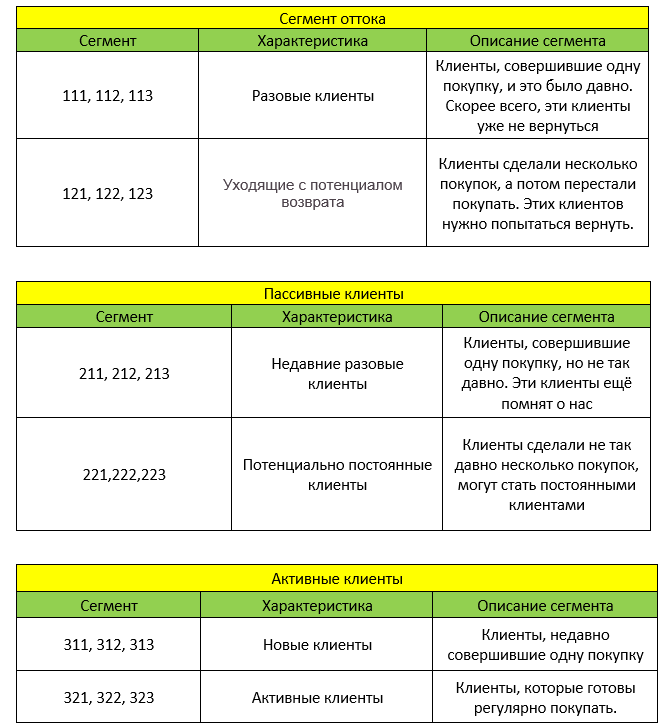
</div>

In [131]:
segt_map = {
    r'11[1-3]': 'Разовые клиенты',
    r'12[1-3]': 'Уходящие с потенциалом возврата',
    r'21[1-3]': 'Недавние разовые клиенты',
    r'22[1-3]': 'Потенциально постоянные клиенты',
    r'31[1-3]': 'Новые клиенты',
    r'32[1-3]': 'Активные клиенты',
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,Segment
0,0000f46a3911fa3c0805444483337064,267,1,69.00,1,1,2,112,Разовые клиенты
1,0000f6ccb0745a6a4b88665a16c9f078,51,1,25.99,3,1,1,311,Новые клиенты
2,0004aac84e0df4da2b147fca70cf8255,18,1,180.00,3,1,3,313,Новые клиенты
3,0005e1862207bf6ccc02e4228effd9a0,273,1,135.00,1,1,3,113,Разовые клиенты
4,0006fdc98a402fceb4eb0ee528f6a8d4,137,1,13.90,2,1,1,211,Недавние разовые клиенты


In [132]:
# Посмотрим на распределение сегментов в наших данных
rfm['Segment'].value_counts()

Недавние разовые клиенты           12183
Разовые клиенты                    11927
Новые клиенты                      11926
Активные клиенты                     382
Потенциально постоянные клиенты      368
Уходящие с потенциалом возврата      270
Name: Segment, dtype: int64

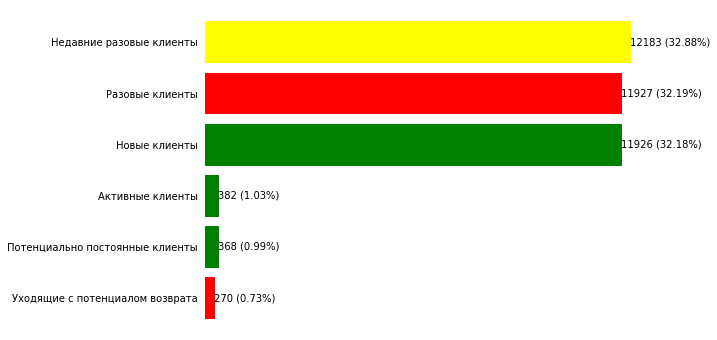

In [135]:
# Визуализируем распредение сегментов
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Активные клиенты', 'Новые клиенты', "Потенциально постоянные клиенты"]:
            bar.set_color('green')
        elif segments_counts.index[i] in ['Недавние разовые клиенты']:
            bar.set_color('yellow')    
        elif segments_counts.index[i] in ['Перспективные клиенты']:
            bar.set_color('orange')
        else: 
            bar.set_color('red') # Красным помечены плохие сегменты
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:} ({:.2f}%)'.format(int(value), value*100/segments_counts.sum()),
                va='center',
                ha='left'
               )

plt.show()

### Вывод:
Исходя из визуализации наших сегментов можно сделать вывод, что идет большой отток клиентов (32.19 %). В то же время и довольно много новых клиентов (32.18 %). Следует задуматься над сменой стратегии по удержанию клиентов. Можно провести опрос, чтобы выяснить, почему клиент перестал покупать, делать регулярные рассылки и т.д. Много новых покупателей говорит о хорошей работе системы по привлечению новых клиентов.